In [1]:
from Izh_net import *
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


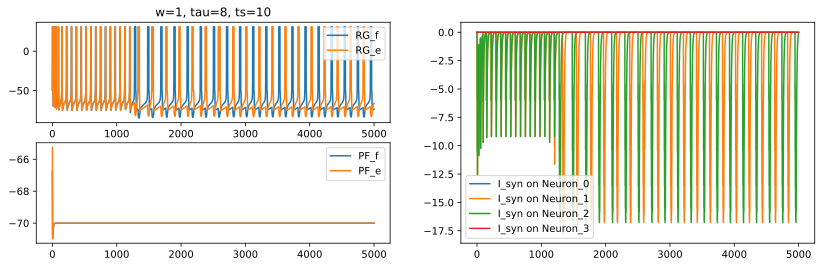

In [2]:
from net_preparation import *
np.random.seed(100)
def run_net(T, net, I_app):
    net.set_init_conditions(v_noise = np.random.normal(size=net.N))
    """
    Procedure of running network 
    args:
    T - discrete time array
    net - network object
    I_app - applied current
    I_aff - afferents activity
    retrun U, V - state of network array with shape(len(T), N), 
    N - size of
    """
    dt = T[1] - T[0]
    N = len(net)
    U = np.zeros((len(T), N))
    V = np.zeros((len(T), N))
    I = np.zeros((len(T), N))
    for i, t in enumerate(T):
        U[i] = net.U_prev
        V[i] = net.V_prev
        I[i] = np.sum(net.I_syn, axis=1)
        net.step(dt=dt, Iapp = I_app(t))
    return U, V, I


def test_Izhikevich_Network(w=1, tau=10, ts=10):
    N=4
    types = ['FS', 'CH', 'CH', 'FS']
    # Create params' array from neurons
    A, B, C, D = types2params(types)
    A[1] = 0.002
    A[2] = 0.002
    B[1] = B[2] = 0.46
    D[1] = D[2] = 1
    print(A, B, C, D)
    net = Izhikevich_Network(N=N, a=A, b=B, c=C, d=D)
    # Neuron_weigths

    net.M = np.array([
        [0, 0, 0, 0],
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [0, 0, 0, 0]
    ])

    W = np.array([
            [0, 0, 0, 0],
            [w, 0, -w, 0],
            [0, -w, 0, w],
            [0, 0, 0, 0]
        ])
    net.set_weights(W)
    net.set_synaptic_relax_constant(
                    np.array(
                        [
                            [1, 1, 1, 1],
                            [tau, 1, tau, 1],
                            [1, tau, 1, tau],
                            [1, 1, 1, 1]
                        ]
                    )
                )
    
    # prepare simulations
    T_max = 5000
    time_scale = 5
    T = np.linspace(0, T_max, T_max*time_scale)
    I = np.zeros(N)
    I[1] = 0
    I[2] = 0
    input = lambda t: (I + 0*np.random.normal(size=N))

    U, V, I= run_net(T, net, input)

    #plotting
    plt.figure(figsize=(14, 4))
    plt.subplot(221)
    plt.title(f'w={w}, tau={tau}, ts={ts}')
    plt.plot(T, V[:, 1], label=f"RG_f")
    plt.plot(T, V[:, 2], label=f"RG_e")
    plt.legend()
    plt.subplot(223)
    plt.plot(T, V[:, 0], label=f"PF_f")
    plt.plot(T, V[:, 3], label=f"PF_e")    
    plt.legend()
    plt.subplot(122)
    for i in range(N):
        plt.plot(T, I[:, i], label=f"I_syn on {net.names[i]}")
    plt.legend()
    plt.show()

test_Izhikevich_Network(tau=8)

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


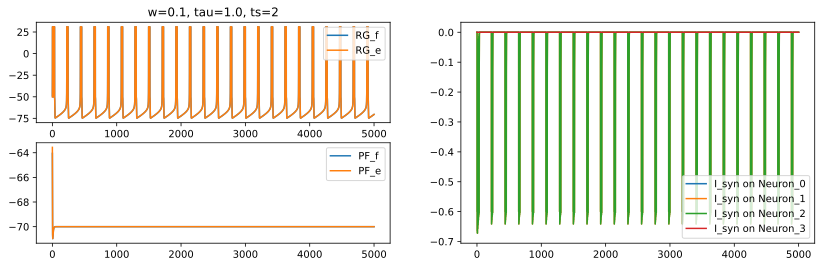

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


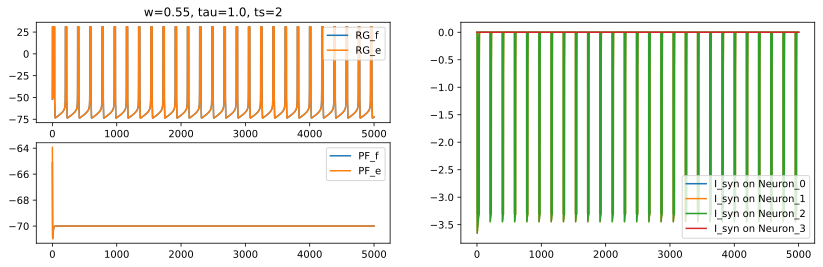

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


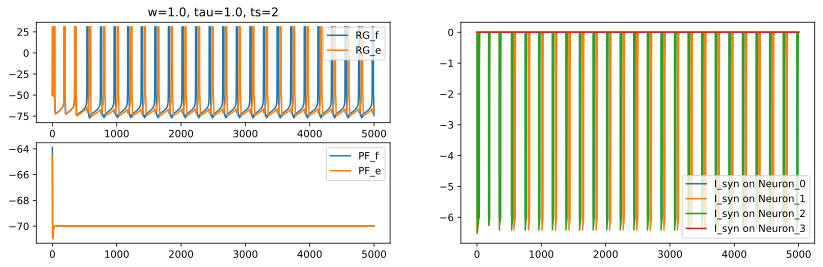

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


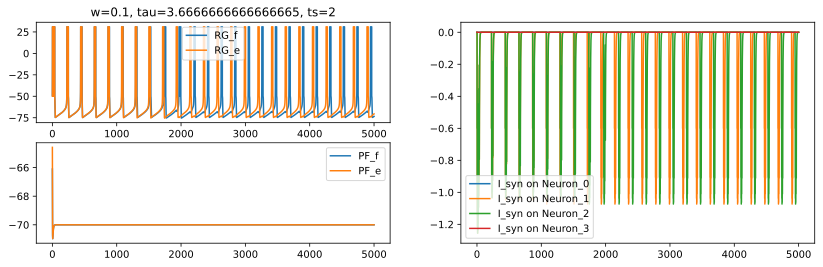

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


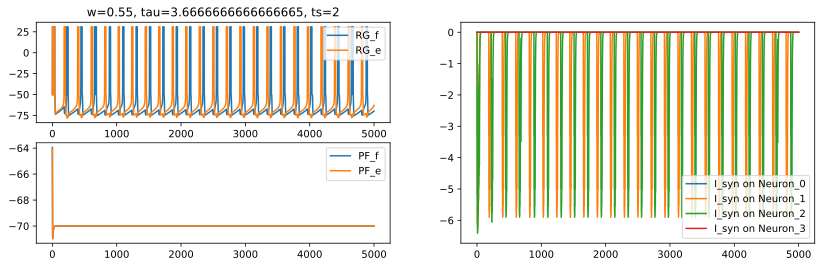

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


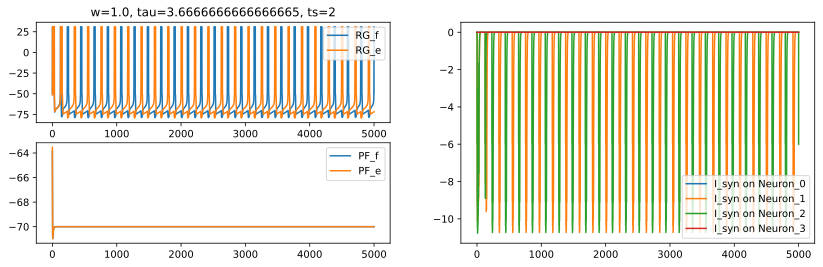

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


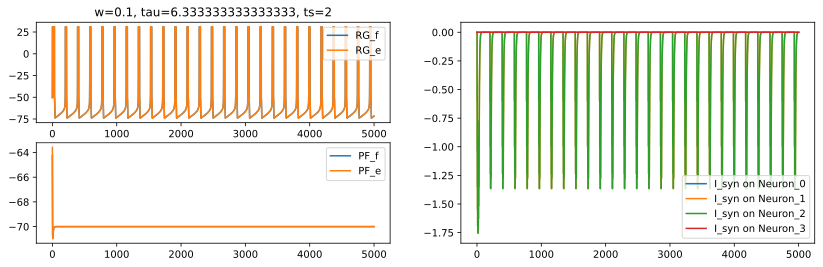

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


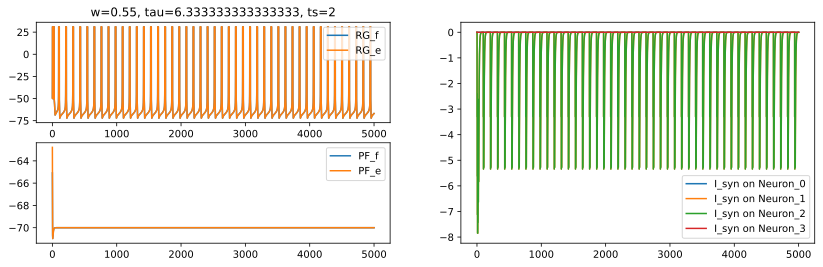

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


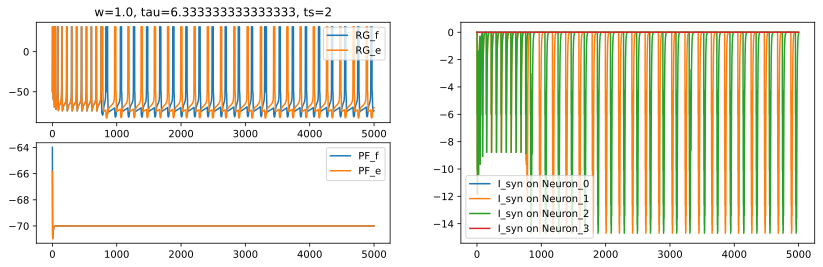

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


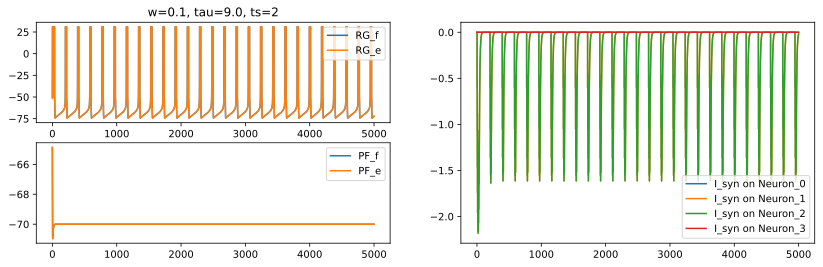

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


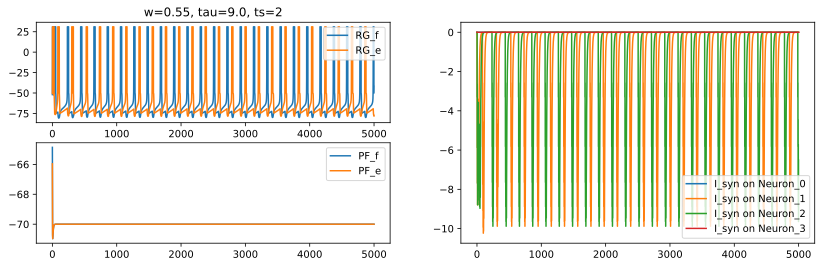

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


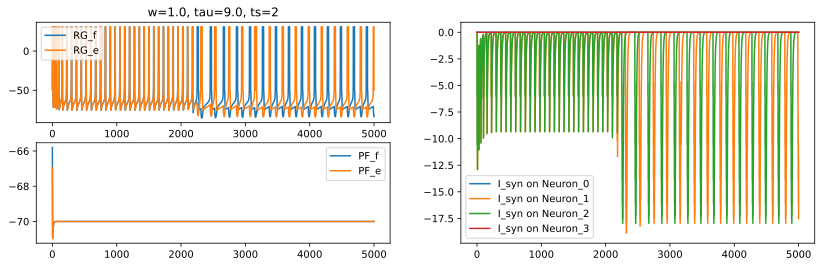

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


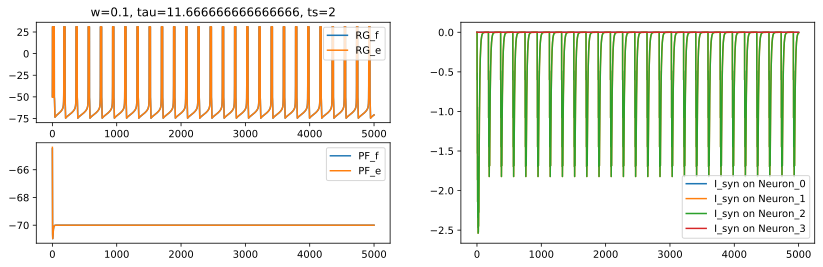

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


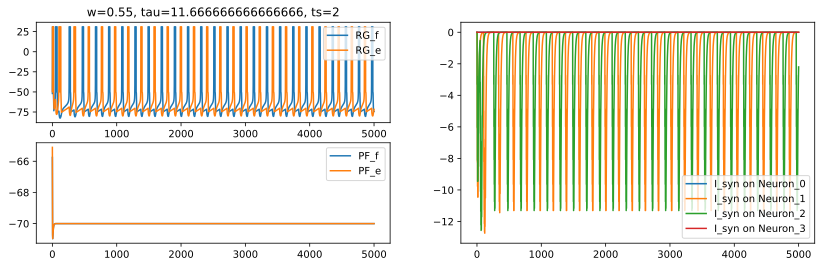

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


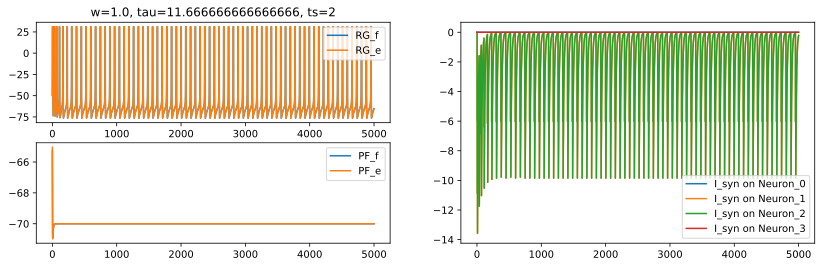

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


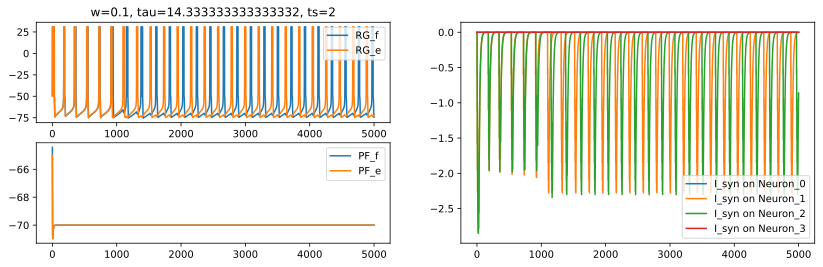

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


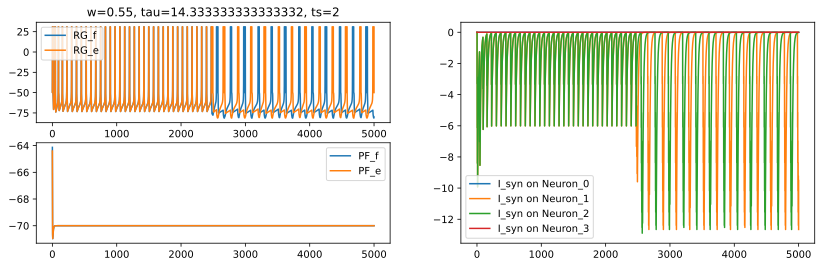

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


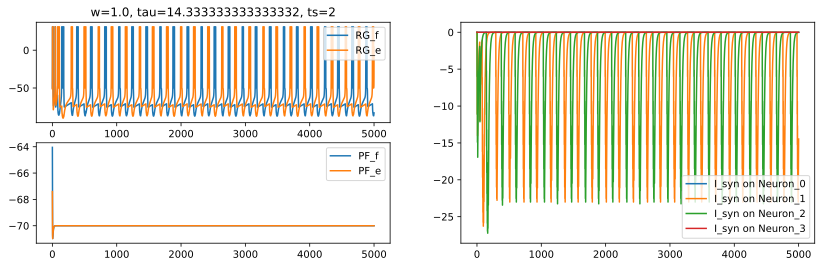

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


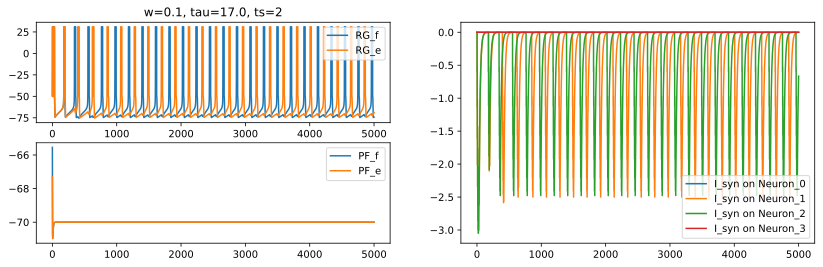

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


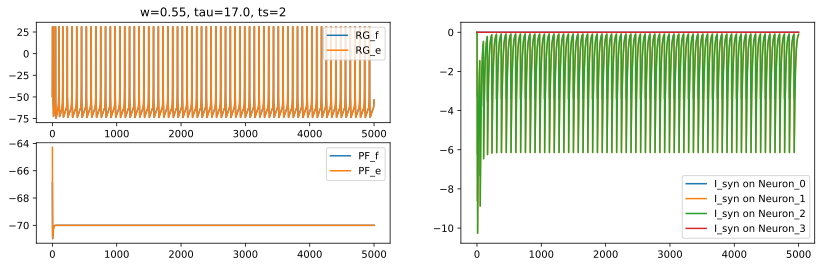

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


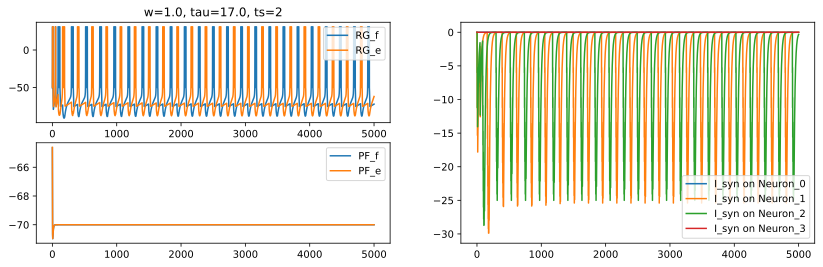

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


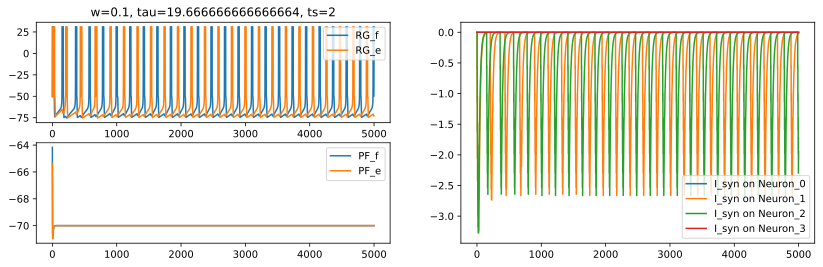

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


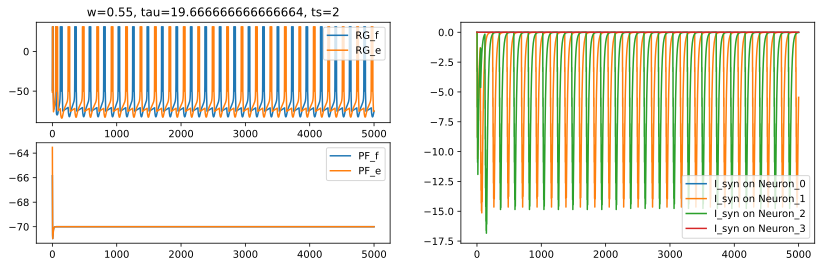

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


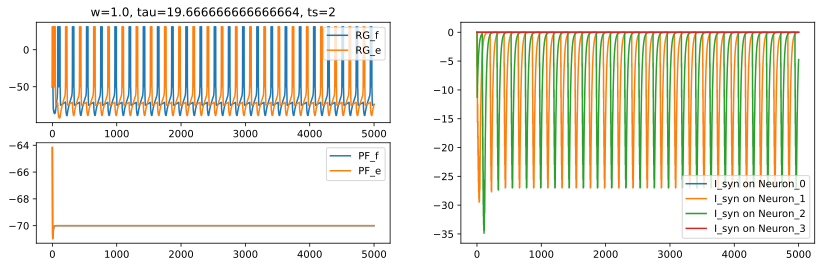

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


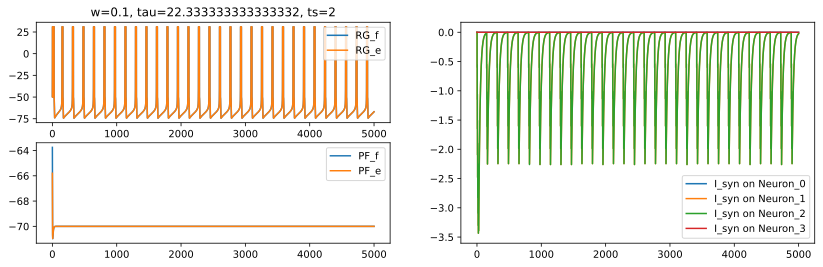

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


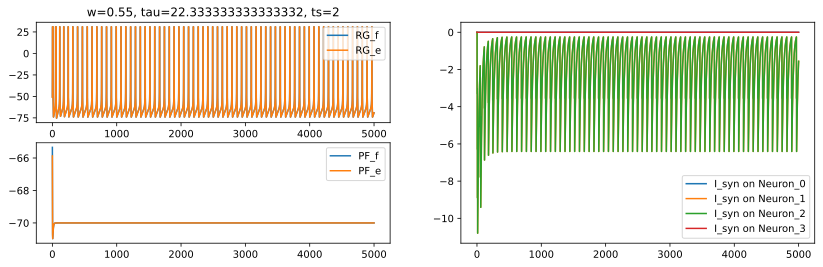

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


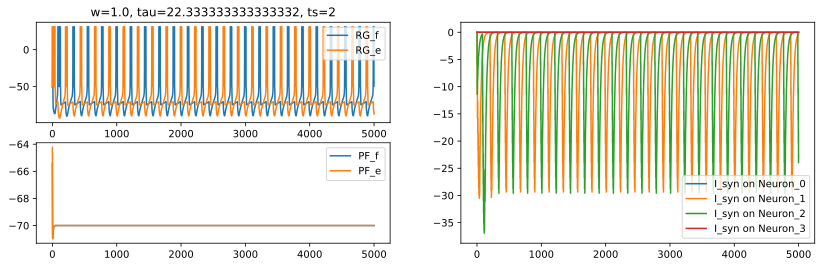

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


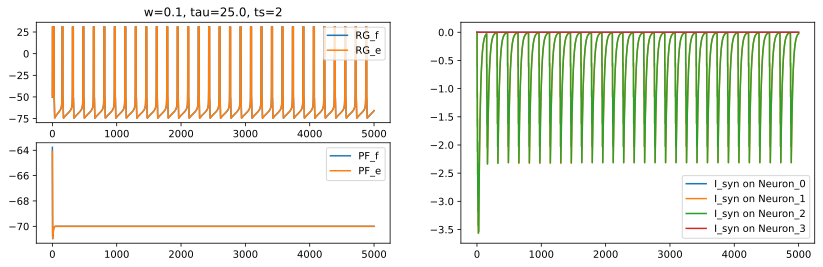

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


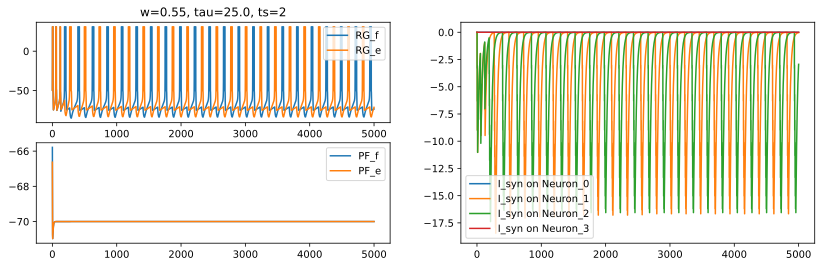

[0.1   0.002 0.002 0.1  ] [0.2  0.46 0.46 0.2 ] [-65. -50. -50. -65.] [2. 1. 1. 2.]


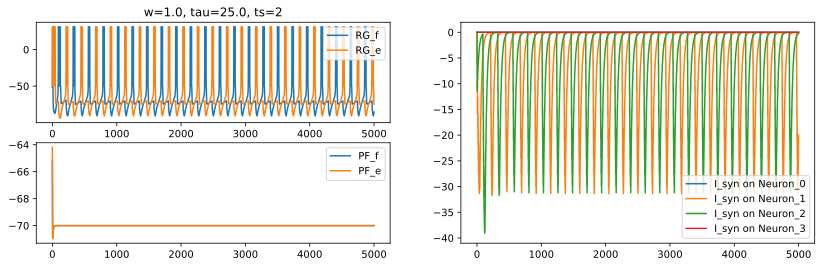

In [3]:
W = np.linspace(0.1, 1, 3)
Tau = np.linspace(1, 25, 10)
ts=2
for j, tau in enumerate(Tau):
    for i, w in enumerate(W):
        test_Izhikevich_Network(w=w, tau=tau, ts=ts)
    